<a href="https://colab.research.google.com/github/Harish-govindaraj/CODSOFT-TASK/blob/main/codsoft_taskno04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from wordcloud import WordCloud # library for visualizing words in text dataimport string
import nltk # natural language tool kit
from nltk.corpus import stopwords # stop words like 'but', 'a', 'an'
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer # tokenizer of text data
from tensorflow.keras.preprocessing.sequence import pad_sequences # makes sure all sequences have the same length
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # used for managing model training and learning rate

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **Handle Data Columns**

In [9]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True) # drop v3, v4, v5

In [10]:
df.rename(columns={'v1': 'spam', 'v2': 'message'}, inplace=True)

In [11]:
df.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#**EDA**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   spam     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='spam', ylabel='count'>

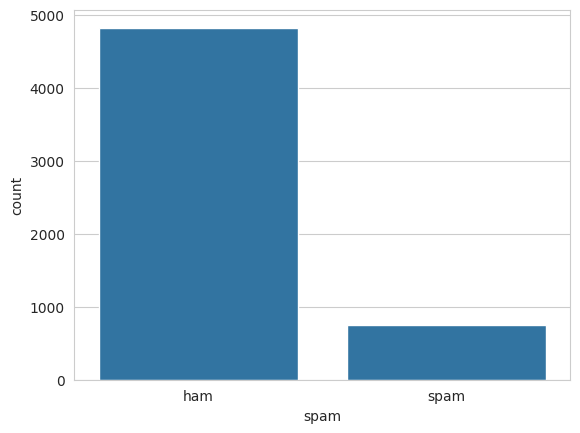

In [13]:
sns.set_style('whitegrid')
sns.countplot(df,
              x='spam')

**Handling NaN values and Duplicates**

In [14]:
df.shape


(5572, 2)

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape


(5169, 2)

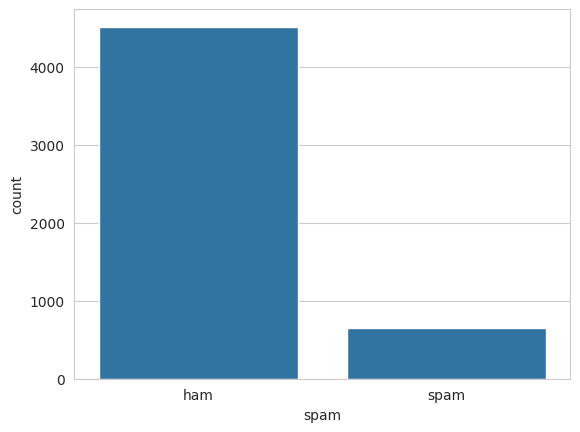

In [19]:
sns.set_style('whitegrid')
sns.countplot(df,
              x='spam');

#**Data Preprocessing**

**Processing target column**

In [20]:
df['spam'] = np.where(df['spam'] == 'ham', 0, 1) # turn target column into numerical values
df.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Processing punctuation**

In [22]:
import string
punctuation_list = string.punctuation

def remove_punctation(text):
    """Removes punctuation"""
    temp = str.maketrans('', '', punctuation_list)
    return text.translate(temp)

df['message'] = df['message'].apply(remove_punctation)
df.head()

,spam,message
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...


**Remove stop words**

In [23]:
def remove_stop_words(text):
    """Remoes stop words from text"""
    stop_words = stopwords.words('english')
    important_words = []
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            important_words.append(word)

    output = ' '.join(important_words)
    return output

df['message'] = df['message'].apply(remove_stop_words)
df.head()

,spam,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


**Data Visualization**

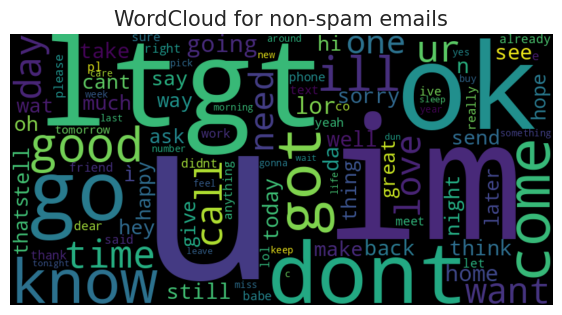

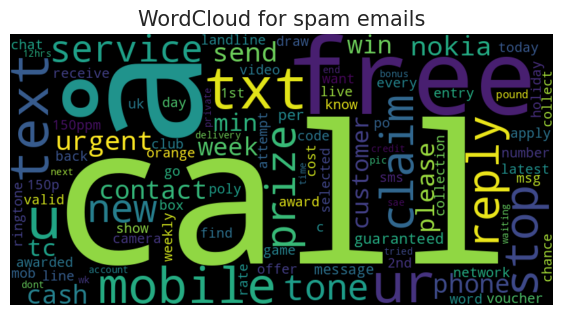

In [24]:
def plot_word_cloud(df, typ):
    """Plots visalization of most common words in text based on its type"""
    email_corpus = ' '.join(df['message'])
    plt.figure(figsize=(7, 7))
    word_cloud = WordCloud(background_color='black',
                           max_words=100,
                           width=800,
                           height=400,
                           collocations=False).generate(email_corpus)
    plt.imshow(word_cloud, interpolation='bilinear'),
    plt.title(f'WordCloud for {typ} emails', fontsize=15),
    plt.axis('off'),
    plt.show()

plot_word_cloud(df[df['spam'] == 0], 'non-spam')
plot_word_cloud(df[df['spam'] == 1], 'spam')


**Tokenization**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],
                                                    df['spam'],
                                                    test_size=0.2,
                                                    random_state=42)

tokenizer= Tokenizer()
tokenizer.fit_on_texts(X_train) # create custom token for our data

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

train_sequences = pad_sequences(train_sequences, # make train sequences the same length (100)
                                maxlen=100,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences, # make test sequences the same length (100)
                               maxlen=100,
                               padding='post',
                               truncating='post')

**Building a Model**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([ # simplest sequentioal model
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=100), # with embedding layer (input)
    GlobalAveragePooling1D(), # 2 hidden layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # and 1 output layer -> will give us either 1 or 0
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
es = EarlyStopping(patience=5, # early stopping will stop model training when we don't have major changes in evaluation (will wait 5 same scores before stopping)
                   monitor='val_accuracy',
                   restore_best_weights=True)

lr = ReduceLROnPlateau(patience=4, # will adjust learning rate based on loss value
                       monitor='val_loss',
                       factor=0.5,
                       verbose=0)

In [28]:
history = model.fit(train_sequences, y_train, epochs=30, batch_size=64, validation_data=(test_sequences, y_test), callbacks=[es, lr])

Epoch 1/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8317 - loss: 0.4358 - val_accuracy: 0.8598 - val_loss: 0.3881 - learning_rate: 0.0010
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8797 - loss: 0.3467 - val_accuracy: 0.8598 - val_loss: 0.3858 - learning_rate: 0.0010
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8770 - loss: 0.3506 - val_accuracy: 0.8598 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8790 - loss: 0.3434 - val_accuracy: 0.8598 - val_loss: 0.3812 - learning_rate: 0.0010
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8799 - loss: 0.3390 - val_accuracy: 0.8598 - val_loss: 0.3797 - learning_rate: 0.0010
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8737 - loss: 0.3482 - val_accuracy: 0.8598 - val_loss: 0.3731 - learning_rate: 0.0010


In [29]:
test_loss, test_accuracy = model.evaluate(test_sequences, y_test)
print('Test Loss :', test_loss)
print('Test Accuracy :', test_accuracy)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.4056
Test Loss : 0.38806214928627014
Test Accuracy : 0.8597679138183594
